In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\тестовые\Займ-экспресс\Anket.csv', sep=';')
df.head()

,Unnamed: 0,DraftId,formula_id,flagFC,flagEF,flagCKB,Amount,ActivityType,Education,Gender,LoanPurpose,MaritalStatus,MonthlyIncome,Post
0,0,3ac9e896-80a7-4d07-af43-a3b775b30739,55,1,1,0,6000.0,торговля,высшее,2,непредвиденные расходы,3.0,45000.0,начальник / руководитель
1,4,f76f3e80-946e-46df-9db6-795d112e63b4,54,1,1,0,6000.0,NaN,среднее специальное,1,непредвиденные расходы,0.0,37000.0,NaN
2,7,187b4bf8-f41c-4a6d-8e27-dc39bc449b90,55,1,1,0,5000.0,другое,среднее специальное,1,подарки,0.0,25000.0,служащий / специалист
3,20,6df8c019-7172-4733-bab1-51d2400e0ec5,55,1,1,0,6600.0,торговля,среднее,2,другое,1.0,25000.0,рабочий
4,23,d160dd00-075b-4e5a-a106-9704d3458261,55,1,1,0,6000.0,промышленность,среднее специальное,1,непредвиденные расходы,3.0,35000.0,служащий / специалист


In [3]:
df.shape

(182007, 14)

In [4]:
print(df.isnull().sum())

Unnamed: 0           0
DraftId              0
formula_id           0
flagFC               0
flagEF               0
flagCKB              0
Amount               0
ActivityType     16509
Education          155
Gender               0
LoanPurpose        155
MaritalStatus        0
MonthlyIncome        0
Post             16358
dtype: int64


In [5]:
df.dtypes

Unnamed: 0         int64
DraftId           object
formula_id         int64
flagFC             int64
flagEF             int64
flagCKB            int64
Amount           float64
ActivityType      object
Education         object
Gender             int64
LoanPurpose       object
MaritalStatus    float64
MonthlyIncome    float64
Post              object
dtype: object

In [6]:
df.describe()

,Unnamed: 0,formula_id,flagFC,flagEF,flagCKB,Amount,Gender,MaritalStatus,MonthlyIncome
count,182007.000000,182007.000000,182007.000000,182007.000000,182007.0,182007.000000,182007.000000,182007.000000,1.820070e+05
mean,253634.108424,54.324295,0.931025,0.987555,0.0,5336.948579,1.422061,0.984171,1.144920e+05
std,146330.665241,1.678618,0.253413,0.110859,0.0,1499.026226,0.495711,1.277574,2.151548e+07
min,0.000000,30.000000,0.000000,0.000000,0.0,2000.000000,1.000000,0.000000,0.000000e+00
25%,126938.000000,54.000000,1.000000,1.000000,0.0,4600.000000,1.000000,0.000000,2.800000e+04
50%,253383.000000,55.000000,1.000000,1.000000,0.0,6000.000000,1.000000,1.000000,3.700000e+04
75%,380746.500000,55.000000,1.000000,1.000000,0.0,6000.000000,2.000000,1.000000,5.000000e+04
max,507246.000000,60.000000,1.000000,1.000000,0.0,30000.000000,4.000000,4.000000,8.000090e+09


In [7]:
# Обработка пропущенных значений
df.fillna({'ActivityType': 'NaN'}, inplace=True)
df.fillna({'Education': 'NaN'}, inplace=True)
df.fillna({'LoanPurpose': 'NaN'}, inplace=True)
df.fillna({'Post': 'NaN'}, inplace=True)

print(df.isnull().sum())

df['MaritalStatus'] = df['MaritalStatus'].astype(str)

Unnamed: 0       0
DraftId          0
formula_id       0
flagFC           0
flagEF           0
flagCKB          0
Amount           0
ActivityType     0
Education        0
Gender           0
LoanPurpose      0
MaritalStatus    0
MonthlyIncome    0
Post             0
dtype: int64


In [8]:
# Сводка категориальных переменных
categorical_vars = ['ActivityType', 'Education', 'Gender', 'LoanPurpose', 'MaritalStatus', 'Post']

for var in categorical_vars:
    print(f"\nDistribution of {var}:")
    print(df[var].value_counts(normalize=True)*100)

# Сводка числовых переменных
numerical_vars = ['Amount', 'MonthlyIncome']

for var in numerical_vars:
    print(f"\nSummary statistics for {var}:")
    print(df[var].describe().apply(lambda x: f'{x:,.2f}'))




Distribution of ActivityType:
ActivityType
торговля                                      22.244749
промышленность                                12.498420
другое                                        10.304549
сервис и услуги                                9.859511
NaN                                            9.070530
строительство и недвижимость                   8.334295
транспорт                                      6.140423
государственная служба                         5.098156
наука и образование                            2.769674
медицина                                       2.648799
армия                                          2.370239
информационные технологии/телекоммуникации     1.999374
финансы, банки, страхование, консалтинг        1.891136
охранная деятельность                          1.877400
добывающий сектор                              1.549391
культура и искусство                           0.970842
ТЭК                                            0.372513
Name

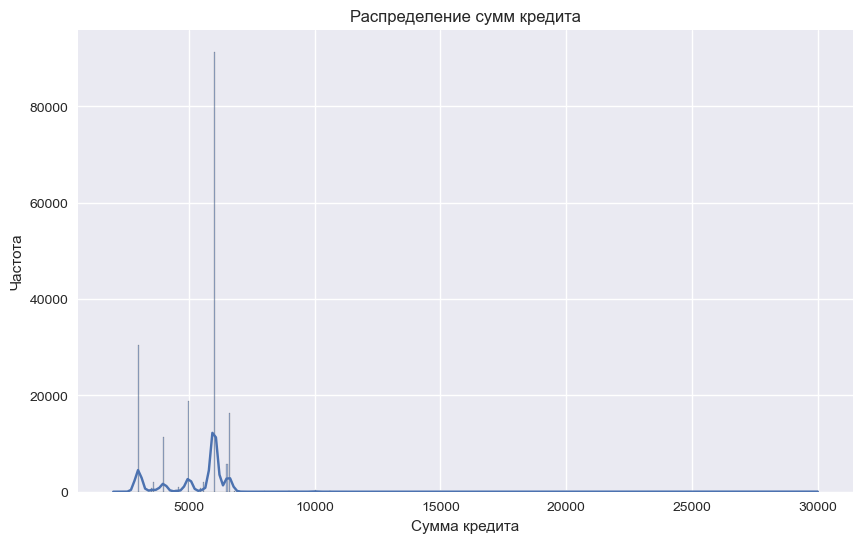

In [9]:
# Настройте стиль построения графика
plt.style.use('seaborn-v0_8')

# Распределение сумм кредита
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], kde=True)
plt.title('Распределение сумм кредита')
plt.xlabel('Сумма кредита')
plt.ylabel('Частота')
plt.show()

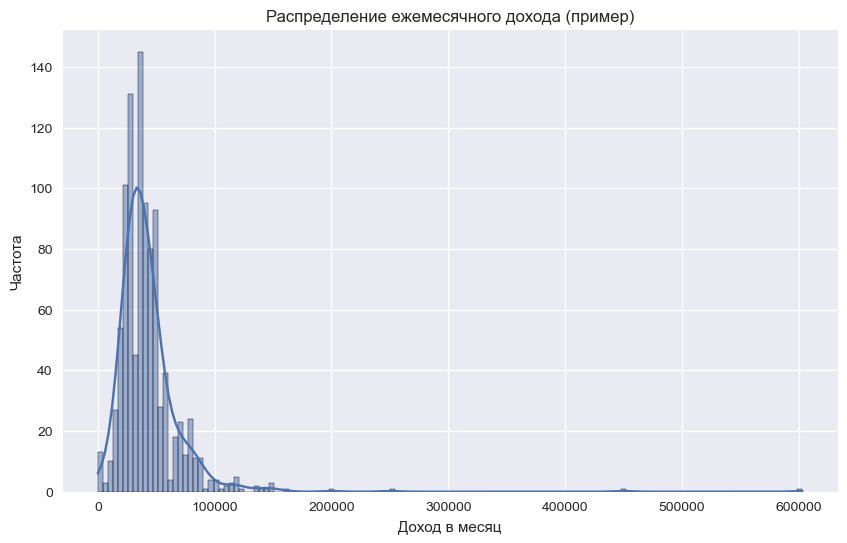

In [10]:
# Пример с 1000 случайными строками 
df_sample = df['MonthlyIncome'].sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
sns.histplot(df_sample, kde=True)
plt.title('Распределение ежемесячного дохода (пример)')
plt.xlabel('Доход в месяц')
plt.ylabel('Частота')
plt.show()


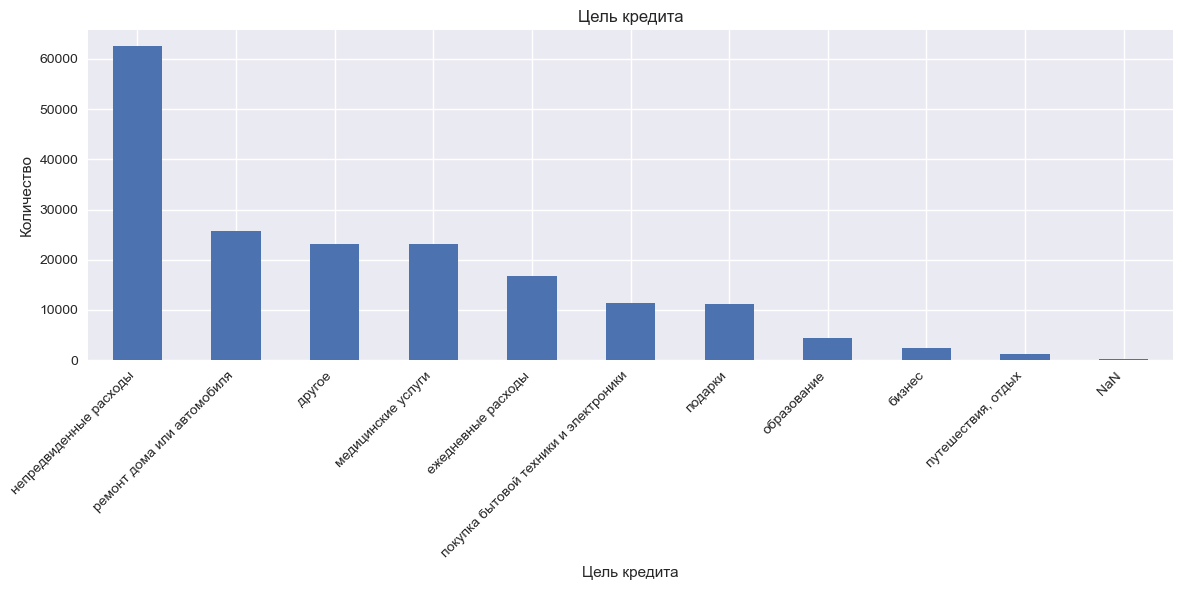

In [11]:
# Разбивка цели кредита
plt.figure(figsize=(12, 6))
df['LoanPurpose'].value_counts().plot(kind='bar')
plt.title('Цель кредита')
plt.xlabel('Цель кредита')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

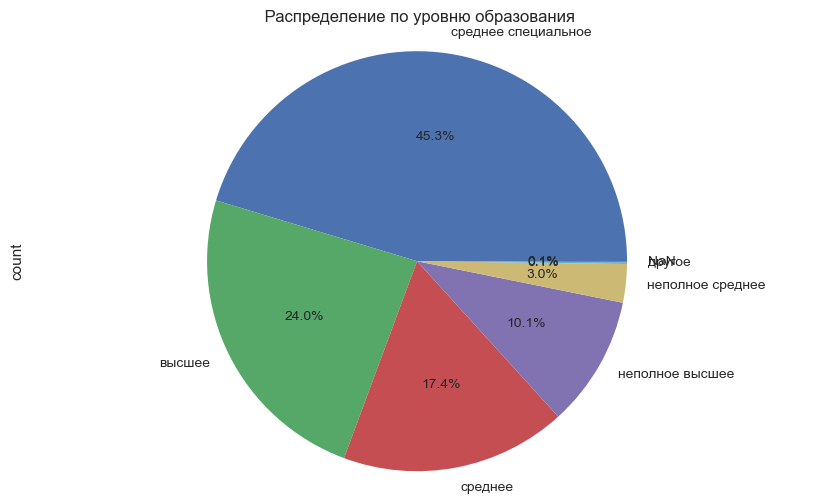

In [12]:
# Распределение по уровню образования
plt.figure(figsize=(10, 6))
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title(' Распределение по уровню образования')
plt.axis('equal')
plt.show()

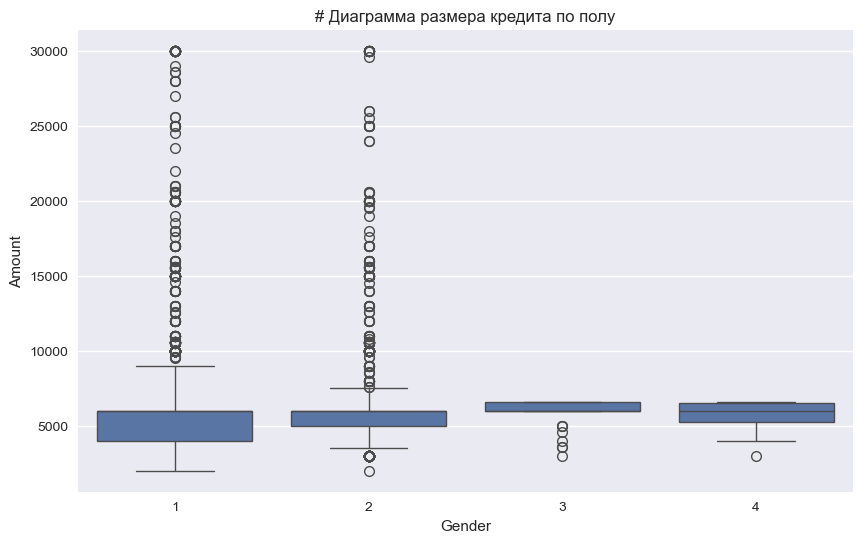

In [13]:
# Диаграмма размера кредита по полу
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Amount', data=df)
plt.title('# Диаграмма размера кредита по полу')
plt.show()

In [14]:
# Задача №2
# Загрузка данных

anket = pd.read_csv(r'D:\тестовые\Займ-экспресс\Anket.csv', sep=';')
payments = pd.read_csv(r'D:\тестовые\Займ-экспресс\Payments.csv', encoding='utf-8', sep=';')

# Объединение данных по DraftId
data = pd.merge(anket, payments, on='DraftId')


# Определяем клиентов, у которых сумма Amount00 + Amount15 + Amount30 = 0
data['TotalAmountPaid'] = data['Amount00'] + data['Amount15'] + data['Amount30']
data['NoPayments'] = (data['TotalAmountPaid'] == 0) & (data['Answer'] == 'Одобрено')

# Фильтрация только клиентов с Answer = 'Одобрено' и LoanAmount > 0 и не NaN
approved_data = data[(data['Answer'] == 'Одобрено') & (data['LoanAmount'].notna()) & (data['LoanAmount'] > 0)]


# Группировка по анкетным признакам и расчет отношения
grouped_data = approved_data.groupby(['ActivityType', 'Post', 'Education', 'Gender', 'LoanPurpose', 'MaritalStatus', 'MonthlyIncome']).agg(
    total_clients=('DraftId', 'count'),
    no_payment_clients=('NoPayments', 'sum')
).reset_index()

# Расчёт отношения клиентов с нулевыми платежами к общему числу клиентов(дефолтность)
grouped_data['NoPaymentRatio'] = grouped_data['no_payment_clients'] / grouped_data['total_clients']

# Выгружаем в Excel для поиска сегмента с 25% дефолтностью и кол-во DraftId's > 1000
grouped_data.to_excel('no_payments_ratio.xlsx', index=False)  # Сохранение в Excel

In [15]:
# Задача 3

# Загрузка данных
anket = pd.read_csv(r'D:\тестовые\Займ-экспресс\Anket.csv', sep=';')
payments = pd.read_csv(r'D:\тестовые\Займ-экспресс\Payments.csv', encoding='utf-8', sep=';')

# Объединение данных по DraftId
data = pd.merge(anket, payments, on='DraftId')

# Фильтрация по сегменту клиентов (высшее образование, служащий / специалист, Gender = 2)
segment_data = data[(data['Education'] == 'высшее') & 
                    (data['Post'] == 'служащий / специалист') & 
                    (data['Gender'] == 2)].copy()  # добавлено .copy()

# Замена пропущенных значений на 0 для полей с выплатами
segment_data.loc[:, 'Amount00'] = segment_data['Amount00'].fillna(0)
segment_data.loc[:, 'Amount15'] = segment_data['Amount15'].fillna(0)
segment_data.loc[:, 'Amount30'] = segment_data['Amount30'].fillna(0)

# Рассчитаем общую сумму выплат до 30-го дня просрочки
segment_data.loc[:, 'TotalAmountPaid'] = segment_data['Amount00'] + segment_data['Amount15'] + segment_data['Amount30']

# Дефолтность - клиенты, у которых общая сумма выплат равна 0
segment_data.loc[:, 'Defaulted'] = segment_data['TotalAmountPaid'] == 0

# Преобразуем ApprovalCreateTime в datetime с обработкой ошибок
segment_data['ApprovalCreateTime'] = pd.to_datetime(segment_data['ApprovalCreateTime'], errors='coerce')

# Теперь можно безопасно извлечь неделю
segment_data['Week'] = segment_data['ApprovalCreateTime'].dt.isocalendar().week

# Группировка по неделям
weekly_data = segment_data.groupby('Week').agg(
    total_clients=('DraftId', 'count'),
    default_clients=('Defaulted', 'sum'),
    total_loan_amount=('LoanAmount', 'sum'),
    total_payments=('Payment', 'sum')
).reset_index()

# Рассчёт дефолтности и доходности по неделям
weekly_data['DefaultRate'] = weekly_data['default_clients'] / weekly_data['total_clients']
weekly_data['Profitability'] = weekly_data['total_payments'] / weekly_data['total_loan_amount']

# Сохранение результата в Excel
weekly_data.to_excel('weekly_default_profitability.xlsx', index=False)

print("Таблица успешно сохранена в 'weekly_default_profitability.xlsx'")


Таблица успешно сохранена в 'weekly_default_profitability.xlsx'
